# Health Insurance Cost Prediction

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("insurance.csv")
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


* 1. Display Top 5 Rows of The Dataset

In [3]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


* 2. Check Last 5 Rows of The Dataset

In [4]:
data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


* 3. Find Shape of Our Dataset (Number of Rows And Number of Columns)

In [5]:
data.shape

(1338, 7)

##### 4. Get Information About Our Dataset Like Total Number Rows, Total Number of Columns, Datatypes of Each Column And Memory Requirement

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


##### 5. Check Null Values In The Dataset

In [7]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

##### 6. Get Overall Statistics About The Dataset

In [8]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


#### 7. Covert Columns From String ['sex','smoker', 'region' ] To Numerical Values

In [9]:
data['sex'].unique()
data['sex']=data['sex'].map({'female':0,'male':1})
data['smoker']=data['smoker'].map({'yes':1,'no':0})
data['region']=data['region'].map({'southwest':1,'southeast':2,
                   'northwest':3,'northeast':4})

In [10]:
data['region'].unique()

array([1, 2, 3, 4], dtype=int64)

In [11]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,3,21984.47061
4,32,1,28.880,0,0,3,3866.85520


### 8. Store Feature Matrix In X and Response(Target) In Vector y

In [12]:
X = data.drop(['charges'],axis=1)
y = data['charges']

In [13]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

## 9. Train/Test split
* 1. Split data into two-part: a training set and a testing set
* 2. Train the model(s) on the training set
* 3. Test the Model(s) on the Testing set

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

### 10. Import the models

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

### 11. Model Training

In [16]:
lr = LinearRegression()
lr.fit(X_train,y_train)
svm = SVR()
svm.fit(X_train,y_train)
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
gr = GradientBoostingRegressor()
gr.fit(X_train,y_train)

GradientBoostingRegressor()

### 12. Prediction on Test Data

In [17]:
y_pred1 = lr.predict(X_test)
y_pred2 = svm.predict(X_test)
y_pred3 = rf.predict(X_test)
y_pred4 = gr.predict(X_test)

df1 = pd.DataFrame({'Actual':y_test,'Lr':y_pred1,
                  'svm':y_pred2,'rf':y_pred3,'gr':y_pred4})

In [18]:
df1

,Actual,Lr,svm,rf,gr
764,9095.06825,8924.407244,9548.261584,10161.612592,11001.128629
887,5272.17580,7116.295018,9492.515425,5220.645834,5840.174656
890,29330.98315,36909.013521,9648.758701,28347.902865,28001.980112
1293,9301.89355,9507.874691,9555.044136,10191.415960,9745.291602
259,33750.29180,27013.350008,9420.421978,34443.093137,33639.100981
...,...,...,...,...,...
109,47055.53210,39116.968669,9648.902852,47276.906503,45431.423211
575,12222.89830,11814.555568,9625.431547,12265.999137,12465.025294
535,6067.12675,7638.107736,9504.168517,6428.822812,6974.336525
543,63770.42801,40959.081722,9605.004594,46798.087951,47862.047791


### 13. Compare Performance Visually 

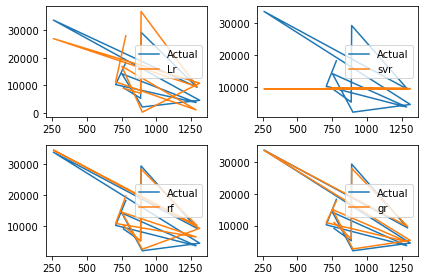

In [19]:
plt.subplot(221)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['Lr'].iloc[0:11],label="Lr")
plt.legend()

plt.subplot(222)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['svm'].iloc[0:11],label="svr")
plt.legend()

plt.subplot(223)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['rf'].iloc[0:11],label="rf")
plt.legend()

plt.subplot(224)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['gr'].iloc[0:11],label="gr")

plt.tight_layout()

plt.legend()

### 14. Evaluating the Algorithm

In [20]:
from sklearn import metrics

In [21]:
score1 = metrics.r2_score(y_test,y_pred1)
score2 = metrics.r2_score(y_test,y_pred2)
score3 = metrics.r2_score(y_test,y_pred3)
score4 = metrics.r2_score(y_test,y_pred4)

In [22]:
print(score1,score2,score3,score4)

0.7833463107364538 -0.07229762787861826 0.8623686542233676 0.8779726251291786


In [23]:
s1 = metrics.mean_absolute_error(y_test,y_pred1)
s2 = metrics.mean_absolute_error(y_test,y_pred2)
s3 = metrics.mean_absolute_error(y_test,y_pred3)
s4 = metrics.mean_absolute_error(y_test,y_pred4)

In [24]:
print(s1,s2,s3,s4)

4186.5088983664355 8592.428727899724 2529.5500500023463 2447.9515580545844


### 15. Predict Charges for New Customer

In [25]:
data = {'age' : 40,
        'sex' : 1,
        'bmi' : 40.30,
        'children' : 4,
        'smoker' : 1,
        'region' : 2}

In [26]:
df = pd.DataFrame(data,index=[0])
df

,age,sex,bmi,children,smoker,region
0,40,1,40.3,4,1,2


In [27]:
new_pred = gr.predict(df)
print("Medical Insurance cost for New Customer is : ",new_pred[0])

Medical Insurance cost for New Customer is :  44757.248538512686


### From above we found that gredianBoostingRegressor is the best model for this dataset. Before production, it is good practice to train our model on the entire dataset.

In [28]:
gr = GradientBoostingRegressor()
gr.fit(X,y)

GradientBoostingRegressor()

#### Predict Charges For New Customer

In [29]:
new_pred = gr.predict(df)
print("Medical Insurance cost for New Customer is : ",new_pred[0])

Medical Insurance cost for New Customer is :  42148.36188800322


#### 16. Save Model Usign Joblib

In [30]:
import joblib

In [31]:
joblib.dump(gr,'model_joblib_test')

['model_joblib_test']

In [32]:
model = joblib.load('model_joblib_test')

In [33]:
model.predict([[40,1,40.3,4,1,2]])

C:\Users\sarbadas\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


array([42148.361888])

## GUI

In [34]:
from tkinter import *

In [35]:
import joblib

In [37]:
def show_entry():
    
    p1 = float(e1.get())
    p2 = float(e2.get())
    p3 = float(e3.get())
    p4 = float(e4.get())
    p5 = float(e5.get())
    p6 = float(e6.get())

    model = joblib.load('model_joblib_test')
    result = model.predict([[p1,p2,p3,p4,p5,p6]])
    
    Label(master, text = "Insurance Cost").grid(row=7)
    Label(master, text=result).grid(row=8)


master =Tk()
master.title("Insurance Cost Prediction")
label = Label(master,text = "Insurance Cost Prediction",bg = "black",
               fg = "white").grid(row=0,columnspan=2)

Label(master,text = "Enter Your Age").grid(row=1)
Label(master,text = "Male Or Female [1/0]").grid(row=2)
Label(master,text = "Enter Your BMI Value").grid(row=3)
Label(master,text = "Enter Number of Children").grid(row=4)
Label(master,text = "Smoker Yes/No [1/0]").grid(row=5)
Label(master,text = "Region [1-4]").grid(row=6)


e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)



e1.grid(row=1,column=1)
e2.grid(row=2,column=1)
e3.grid(row=3,column=1)
e4.grid(row=4,column=1)
e5.grid(row=5,column=1)
e6.grid(row=6,column=1)


Button(master,text="Predict",command=show_entry).grid()

mainloop()

C:\Users\sarbadas\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
